## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from LVQClassifier import LVQClassifier as LVQ
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Iris Dataset

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state = 123, stratify=y)

# Perception Classifier

In [3]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Perceptron
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  fit_intercept : bool, default=True
 |      Whether the intercept should be estimated or not. If False, the
 |      data is assumed to be already centered.
 |  
 |  max_iter : int, default=1000
 |      The maximum number of 

In [4]:
# initialize model
perceptron = Perceptron()

# hyperparameter
perceptron_param = {
    'penalty':['l1', 'l2'],
    'alpha':1/10 ** np.arange(5),
    'fit_intercept':[True, False],
    'max_iter':10**np.arange(5)
}

In [5]:
perceptron_grid = GridSearchCV(estimator=perceptron, param_grid=perceptron_param, cv=2)

perceptron_grid.fit(X_train, y_train)

print(perceptron_grid.best_params_)
print(perceptron_grid.best_score_)

{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1'}
0.9432148040638606


In [6]:
perceptron_result = pd.DataFrame(perceptron_grid.cv_results_)
perceptron_result[['mean_fit_time', 'mean_test_score']].describe()

,mean_fit_time,mean_test_score
count,100.000000,100.000000
mean,0.002630,0.524975
std,0.000387,0.173309
min,0.001994,0.333273
25%,0.002494,0.333454
50%,0.002505,0.503266
75%,0.002996,0.666727
max,0.003502,0.943215


[Text(0, 0.5, 'Mean Test Scire'),
 Text(0.5, 1.0, 'Average Test Score for all parameters')]

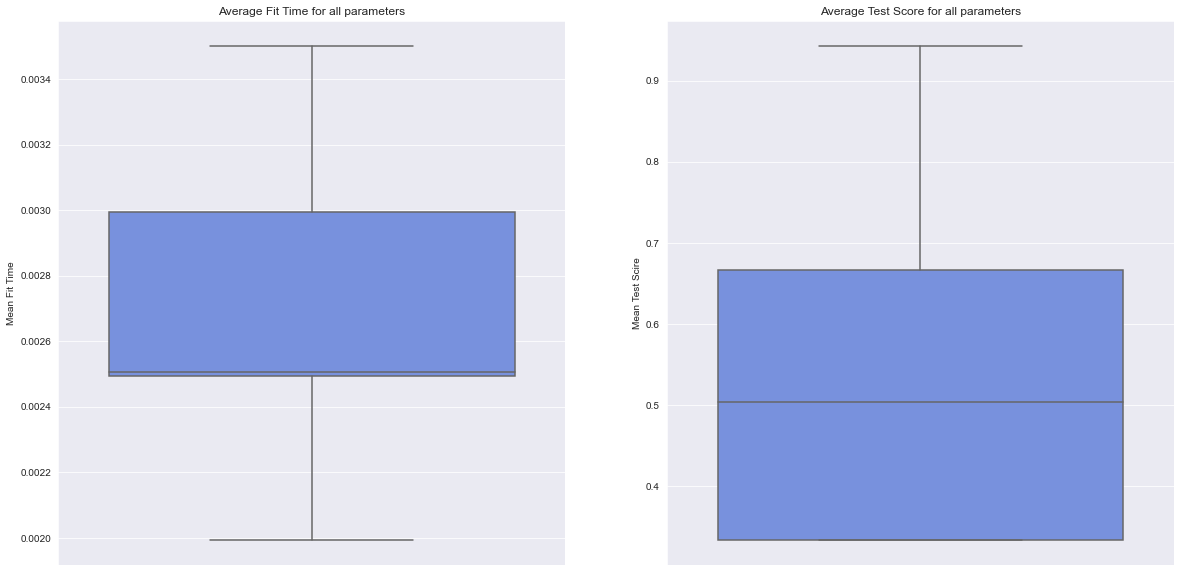

In [7]:
plot_objects = plt.subplots(ncols=2, figsize=(20, 10))
fig, (ax1, ax2) = plot_objects

sns.set_palette('coolwarm')

sns.boxplot(y='mean_fit_time', data=perceptron_result, ax=ax1)
sns.boxplot(y='mean_test_score', data=perceptron_result, ax=ax2)

ax1.set(ylabel='Mean Fit Time', title='Average Fit Time for all parameters')
ax2.set(ylabel='Mean Test Scire', title='Average Test Score for all parameters')


# MLPClassifier

In [8]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

In [9]:
# initialize model
mlp = MLPClassifier()

# Hyperparameter
mlp_param = {
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha':1/10 ** np.arange(5),
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'max_iter':10**np.arange(5)
}

In [10]:
mlp_grid = GridSearchCV(estimator=mlp, param_grid=mlp_param, cv=2)

mlp_grid.fit(X_train, y_train)

print(mlp_grid.best_params_)
print(mlp_grid.best_score_)

{'activation': 'identity', 'alpha': 1.0, 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
0.9905660377358491


In [11]:
pd.DataFrame(mlp_grid.cv_results_).describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
count,900.000000,9.000000e+02,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.177373,1.896320e-02,0.000648,0.000258,0.728407,0.740107,0.734257,0.038869,413.465556
std,0.246557,4.678164e-02,0.000384,0.000274,0.292032,0.310991,0.294041,0.055323,292.665693
min,0.000987,1.192093e-07,0.000000,0.000000,0.000000,0.000000,0.114296,0.000181,1.000000
25%,0.007506,4.982054e-04,0.000499,0.000001,0.339623,0.346154,0.400581,0.009434,211.000000
50%,0.067140,1.502156e-03,0.000502,0.000132,0.924528,0.961538,0.943033,0.012881,449.000000
75%,0.342577,1.559234e-02,0.000999,0.000500,0.981132,1.000000,0.981132,0.037418,675.000000
max,1.556857,4.510955e-01,0.003497,0.002499,0.981132,1.000000,0.990566,0.349057,900.000000


In [12]:
mlp_result = pd.DataFrame(mlp_grid.cv_results_)
mlp_result[['mean_fit_time', 'mean_test_score']].describe()

,mean_fit_time,mean_test_score
count,900.000000,900.000000
mean,0.177373,0.734257
std,0.246557,0.294041
min,0.000987,0.114296
25%,0.007506,0.400581
50%,0.067140,0.943033
75%,0.342577,0.981132
max,1.556857,0.990566


[Text(0, 0.5, 'Mean Test Scire'),
 Text(0.5, 1.0, 'Average Test Score for all parameters')]

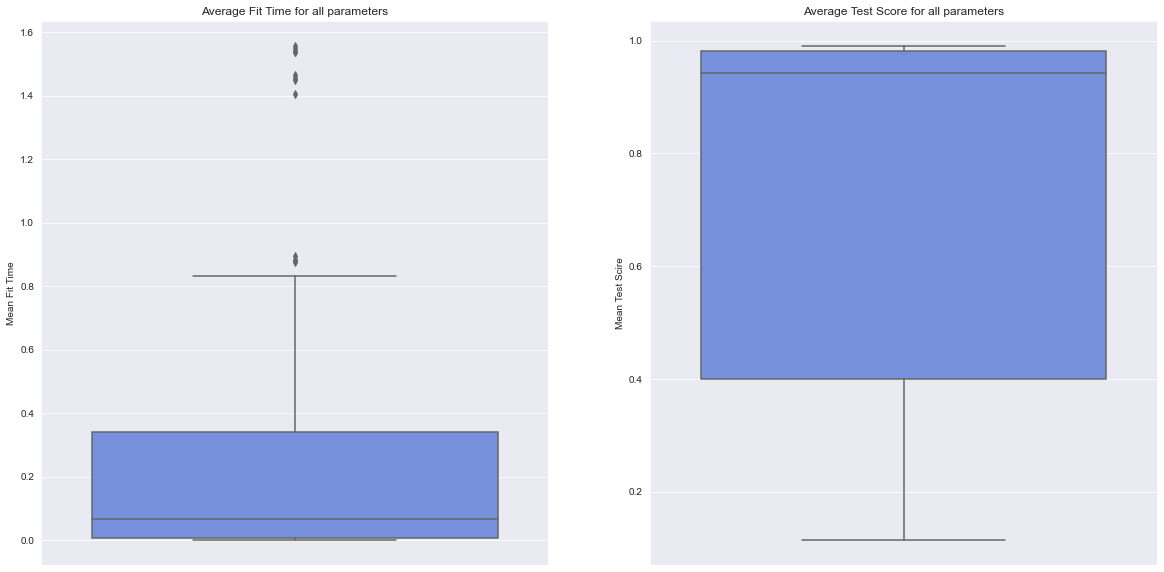

In [13]:
plot_objects = plt.subplots(ncols=2, figsize=(20, 10))
fig, (ax1, ax2) = plot_objects

sns.boxplot(y='mean_fit_time', data=mlp_result, ax=ax1)
sns.boxplot(y='mean_test_score', data=mlp_result, ax=ax2)

ax1.set(ylabel='Mean Fit Time', title='Average Fit Time for all parameters')
ax2.set(ylabel='Mean Test Scire', title='Average Test Score for all parameters')


# LVQ

In [14]:
help(LVQ)

Help on class LVQClassifier in module LVQClassifier:

class LVQClassifier(builtins.object)
 |  LVQClassifier(n_components=1, alpha=0.5, decrease_rate=0.9, epochs=3, random_state=1, p=2, bias_decrease_rate=0.9, LVQ2=False, initial_state='Normal', sigma=1.0, algorithm='LVQ', lamb=0.1, verbose=0)
 |  
 |  Learning vector quantization (LVQ) is a prototype-based supervised classification algorithm
 |  proposed by T. Kohonen.
 |  
 |  This type of neural network is used for classification. It is sometimes called a self-organizing
 |  neural net. It iteratively classifies inputs, until the combined difference between classes is maximized.
 |  This algorithm can be used as a simple way to cluster data, if the number of cases or categories is
 |  not particularly large.
 |  
 |  A major disadvatange is that for data sets with a large number of categories,
 |  training the network can take a very long time.
 |  
 |  from Wikipedia:
 |  
 |  "An LVQ system is represented by prototypes W=(w(i),...

In [15]:
# initialize classifier model
lvq = LVQ()

lvq_param = {
    'n_components':np.arange(1, 11),
    'alpha':1/10 ** np.arange(5),
    'LVQ2':[True, False],
}

In [16]:
lvq_grid = GridSearchCV(estimator=lvq, param_grid=lvq_param, cv=2)

lvq_grid.fit(X_train, y_train)

print(lvq_grid.best_params_)
print(lvq_grid.best_score_)

{'LVQ2': False, 'alpha': 1.0, 'n_components': 3}
0.9811320754716981


In [17]:
lvq_result = pd.DataFrame(lvq_grid.cv_results_)
lvq_result[['mean_fit_time', 'mean_test_score']].describe()

,mean_fit_time,mean_test_score
count,100.000000,100.000000
mean,0.010964,0.943403
std,0.001230,0.017674
min,0.009000,0.885341
25%,0.010011,0.943033
50%,0.010996,0.943124
75%,0.011501,0.952649
max,0.017002,0.981132


[Text(0, 0.5, 'Mean Test Scire'),
 Text(0.5, 1.0, 'Average Test Score for all parameters')]

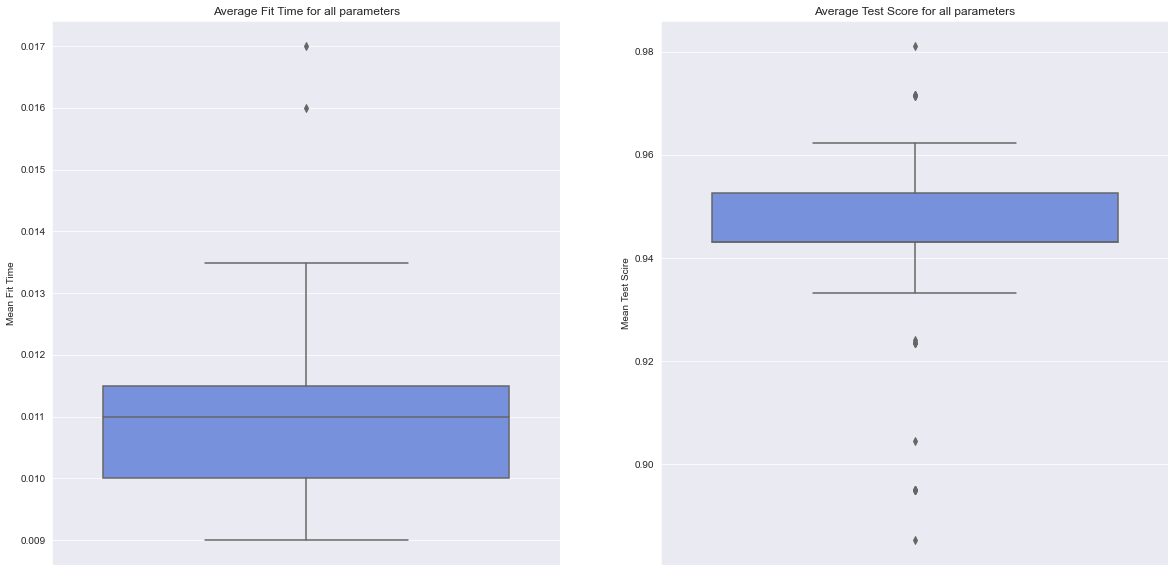

In [18]:
plot_objects = plt.subplots(ncols=2, figsize=(20, 10))
fig, (ax1, ax2) = plot_objects

sns.boxplot(y='mean_fit_time', data=lvq_result, ax=ax1)
sns.boxplot(y='mean_test_score', data=lvq_result, ax=ax2)

ax1.set(ylabel='Mean Fit Time', title='Average Fit Time for all parameters')
ax2.set(ylabel='Mean Test Scire', title='Average Test Score for all parameters')
